In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import scipy
import itertools as itt
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

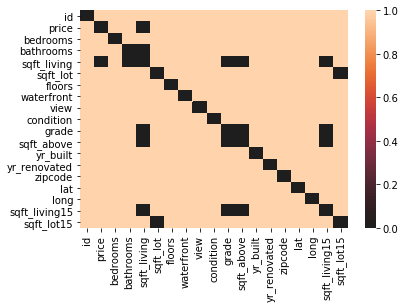

In [5]:
sns.heatmap(((df.corr() < 0.7) & (df.corr() > -0.7)), center=0)

In [6]:
print('Waterfront ' + str(round(df.isna().sum()['waterfront']/len(df.waterfront) *100, 2)) + ' % NaN')

print('View ' + str(round(df.isna().sum()['view']/len(df.view) *100, 2)) + ' % NaN')

print('Year Renovated ' + str(round(df.isna().sum()['yr_renovated']/len(df.yr_renovated) *100, 2)) + ' % NaN')

Waterfront 11.0 % NaN
View 0.29 % NaN
Year Renovated 17.79 % NaN


In [7]:
df = df.rename(columns={'date' : 'date_sold'})
df = df.rename(columns={'price' : 'price_sold'})
df = df.rename(columns={'view' : 'view_grade'})
df = df.rename(columns={'sqft_above' : 'sqft_not_basement'})
df = df.rename(columns={'sqft_living15' : 'sqft_living_15_neighbours'})
df = df.rename(columns={'sqft_lot15' : 'sqft_lot_15_neighbours'})

In [8]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df = df.fillna(value={'yr_renovated' : 0})
df = df.fillna(value={'view_grade' : df.view_grade.median()})
df = df.fillna(value={'waterfront' : df.waterfront.median()})

In [10]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Changed ? in sqft_basement to actual value

In [11]:
df.sqft_basement = (df.sqft_living - df.sqft_not_basement)

In [12]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                           21597 non-null int64
date_sold                    21597 non-null object
price_sold                   21597 non-null float64
bedrooms                     21597 non-null int64
bathrooms                    21597 non-null float64
sqft_living                  21597 non-null int64
sqft_lot                     21597 non-null int64
floors                       21597 non-null float64
waterfront                   21597 non-null float64
view_grade                   21597 non-null float64
condition                    21597 non-null int64
grade                        21597 non-null int64
sqft_not_basement            21597 non-null int64
sqft_basement                21597 non-null int64
yr_built                     21597 non-null int64
yr_renovated                 21597 non-null float64
zipcode                      21597 non-null int64
lat                         

Changing all dates to datetime objects

In [14]:
df.date_sold = pd.to_datetime(df.date_sold)
df.yr_renovated = df.yr_renovated.astype('int64')

In [15]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df.columns

Index(['id', 'date_sold', 'price_sold', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view_grade', 'condition', 'grade',
       'sqft_not_basement', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living_15_neighbours',
       'sqft_lot_15_neighbours'],
      dtype='object')

In [17]:
# df['coordinates'] = list(zip(df.lat, df.long))

In [18]:
# df.coordinates.head()

In [19]:
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

In [20]:
df.bedrooms.value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [21]:
# Could also have a choice argument that gives the number of choices in any set of headers
# to do this would require another for loop going over the second argument of combins
# also could have a dataframe argument to allow the function to be used elsewhere

def analyse(head_list):
    combins = list(itt.combinations(head_list, 3))
    for i in range(len(combins)):
        headvar1 = combins[i][0]
        headvar2 = combins[i][1]
        headvar3 = combins[i][2]
        minidf = pd.DataFrame({headvar1:df[headvar1], headvar2:df[headvar2],
                               headvar3:df[headvar3], 'price_sold':df['price_sold']})
        X = minidf.drop('price_sold',axis=1)
        y = minidf['price_sold']
        print("This is the head of the {}, {}, {} dataframe".format(headvar1, headvar2, headvar3))
        display(X.head())

        # Setting up the LEARNER
        X = sm.add_constant(X)
        model_sm = sm.OLS(y,X)

         # Actually LEARNING
        results = model_sm.fit()

        # Evaluating performance
        r2 = results.rsquared.round(2)
        print('R2 = {}'.format(r2))

        # Understanding the LEARNED model
        est_b = results.params
        print(est_b.round(4))

        # Getting the pvalues out
        pvals = results.pvalues
        print('Pvalues: \n {} \n'.format(pvals))

        # Need to clear xy after each pass through i
        X = []
        Y= []

#         Idea is to go through i, make a minidata frame, do analysis on it then 
#         return the pvalues
        

In [22]:
list(df.columns)[3:-6]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view_grade',
 'condition',
 'grade',
 'sqft_not_basement',
 'sqft_basement',
 'yr_built']

In [23]:
hlist = ['condition', 'grade', 'yr_renovated', 'view_grade', 'sqft_lot', 'sqft_living']

In [24]:
# analyse(list(df.columns)[3:-6])

In [25]:
# list(df.drop(['price_sold', 'id', 'waterfront', 'date_sold', 'zipcode', 'lat', 'long', 'coordinates'], axis=1).columns)
# This is just picking out what we think of as 'good' variables

In [26]:
df_control =df.drop(['id', 'date_sold', 'waterfront', 'view_grade', 'condition', 'grade', 'yr_built',
                     'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living_15_neighbours','sqft_lot_15_neighbours'],
                    axis=1)

In [27]:
df_control.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,1180,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400
2,180000.0,2,1.00,770,10000,1.0,770,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910
4,510000.0,3,2.00,1680,8080,1.0,1680,0


In [28]:
# A function that can take any of our dataframes and returns an R2 ranking for each group of 3 of its columns


def r2(data):
    head_list = list(data.drop('price_sold', axis=1).columns)
    combins = list(itt.combinations(head_list, 3))
    r2data = pd.DataFrame()
    for i in range(len(combins)):
        headvar1 = combins[i][0]
        headvar2 = combins[i][1]
        headvar3 = combins[i][2]
        triple = '{}, {}, and {}'.format(headvar1, headvar2, headvar3)
        minidf = pd.DataFrame({headvar1:data[headvar1], headvar2:data[headvar2],
                               headvar3:data[headvar3], 'price_sold':data['price_sold']})
        X = minidf.drop('price_sold',axis=1)
        y = minidf['price_sold']

        # Setting up the LEARNER
        X = sm.add_constant(X)
        model_sm = sm.OLS(y,X)

         # Actually LEARNING
        results = model_sm.fit()

        # Evaluating performance
        r2 = results.rsquared.round(2)
        
        # Add to the R2 dataframe
        triple_r2_df = pd.DataFrame(data = {'Triples': [triple, 'delete me'], 'R_squared': [r2,'and me']})
        triple_r2_df = triple_r2_df[:1]
        
        r2data = r2data.append(triple_r2_df, ignore_index=True)
        
    r2data = r2data.set_index('Triples')
    r2data = r2data.sort_values(by=['R_squared'])
    return r2data


In [29]:
# shape of r2data data frame is 364 long

In [30]:
r2(df_control).head()

,R_squared
Triples,
"bedrooms, sqft_lot, and floors",0.15
"bedrooms, sqft_lot, and sqft_basement",0.16
"sqft_lot, floors, and sqft_basement",0.23
"bedrooms, floors, and sqft_basement",0.24
"bedrooms, bathrooms, and sqft_lot",0.28


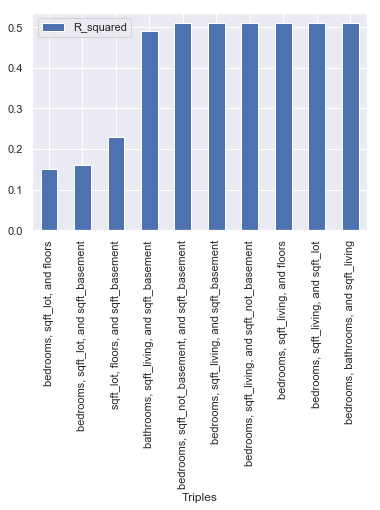

In [115]:
# Ploting the R squared values for the five worst and five best models

r2(df_control)[:3].append(r2(df_control)[-7:]).plot.bar()

In [32]:
df_control_priceq1 = df_control.loc[df_control['price_sold'] < df_control.price_sold.quantile(.25)]

In [33]:
df_control_priceq1.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,1180,0
2,180000.0,2,1.00,770,10000,1.0,770,0
6,257500.0,3,2.25,1715,6819,2.0,1715,0
7,291850.0,3,1.50,1060,9711,1.0,1060,0
8,229500.0,3,1.00,1780,7470,1.0,1050,730


In [34]:
df_control_priceq2 = df_control.loc[(df_control['price_sold'] > df_control.price_sold.quantile(.25)) 
                                    & (df_control['price_sold'] < df_control.price_sold.quantile(.50))]
df_control_priceq2.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
9,323000.0,3,2.50,1890,6560,2.0,1890,0
13,400000.0,3,1.75,1370,9680,1.0,1370,0
16,395000.0,3,2.00,1890,14040,2.0,1890,0
20,385000.0,4,1.75,1620,4980,1.0,860,760
24,329000.0,3,2.25,2450,6500,2.0,2450,0


In [35]:
df_control_priceq2.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
9,323000.0,3,2.50,1890,6560,2.0,1890,0
13,400000.0,3,1.75,1370,9680,1.0,1370,0
16,395000.0,3,2.00,1890,14040,2.0,1890,0
20,385000.0,4,1.75,1620,4980,1.0,860,760
24,329000.0,3,2.25,2450,6500,2.0,2450,0


In [36]:
df_control_priceq3 = df_control.loc[(df_control['price_sold'] > df_control.price_sold.quantile(.5)) 
                                    & (df_control['price_sold'] < df_control.price_sold.quantile(.75))]
df_control_priceq3.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
1,538000.0,3,2.25,2570,7242,2.0,2170,400
3,604000.0,4,3.00,1960,5000,1.0,1050,910
4,510000.0,3,2.00,1680,8080,1.0,1680,0
11,468000.0,2,1.00,1160,6000,1.0,860,300
14,530000.0,5,2.00,1810,4850,1.5,1810,0


In [37]:
df_control_priceq3.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
1,538000.0,3,2.25,2570,7242,2.0,2170,400
3,604000.0,4,3.00,1960,5000,1.0,1050,910
4,510000.0,3,2.00,1680,8080,1.0,1680,0
11,468000.0,2,1.00,1160,6000,1.0,860,300
14,530000.0,5,2.00,1810,4850,1.5,1810,0


In [38]:
df_control_priceq4 = df_control.loc[df_control['price_sold'] > df_control.price_sold.quantile(.75)]
df_control_priceq4.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
5,1230000.0,4,4.50,5420,101930,1.0,3890,1530
10,662500.0,3,2.50,3560,9796,1.0,1860,1700
15,650000.0,4,3.00,2950,5000,2.0,1980,970
21,2000000.0,3,2.75,3050,44867,1.0,2330,720
26,937000.0,3,1.75,2450,2691,2.0,1750,700


In [ ]:
>>> import seaborn as sns; sns.set(color_codes=True)
>>> tips = sns.load_dataset("tips")
>>> g = sns.lmplot(x="total_bill", y="tip", data=tips)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


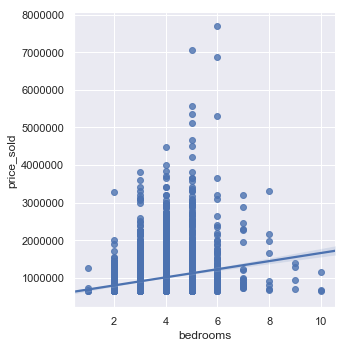

In [112]:
q4_data = df_control_priceq4.drop(['bathrooms', 'sqft_lot', 'sqft_not_basement', 'sqft_basement'],axis=1)

Xq4 = q4_data.drop('price_sold', axis=1)

yq4 = q4_data['price_sold']

titles = ['bedrooms', 'sqft_living', 'floors']

sns.set(color_codes=True)
sns.lmplot(x=titles[0], y='price_sold', data=q4_data)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


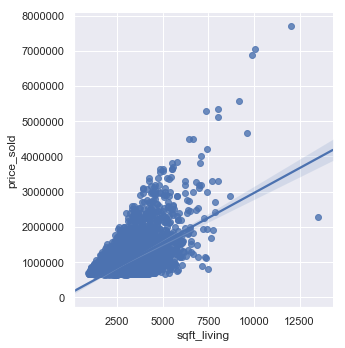

In [110]:
sns.lmplot(x=titles[1], y='price_sold', data=q4_data)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


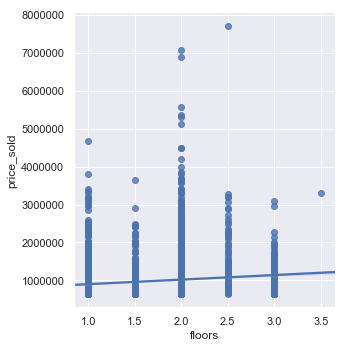

In [109]:
sns.lmplot(x=titles[2], y='price_sold', data=q4_data)

In [108]:
# Setting up the LEARNER
Xq4 = sm.add_constant(Xq4)
model_sm = sm.OLS(yq4,Xq4)

# Actually LEARNING
resultsq4 = model_sm.fit()

# Evaluating performance
r2q4 = resultsq4.rsquared
r2q4 = r2q4.round(2)
print('R2 = {}'.format(r2q4))

# # Understanding the LEARNED model
est_b = resultsq4.params
print(est_b.round(4))

R2 = 0.38
const          341889.6953
bedrooms       -47456.6426
sqft_living       309.2280
floors         -58387.5377
dtype: float64


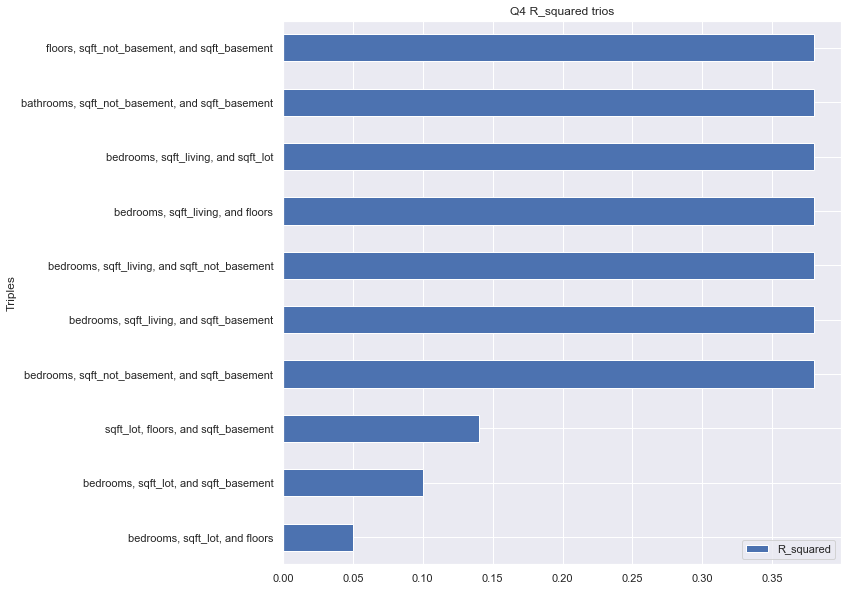

In [172]:
# plt.figure(figsize=(10,100))
plt.rcParams["figure.figsize"] = [10,10]
r2(df_control_priceq4)[:3].append(r2(df_control_priceq4)[-7:]).plot.barh(title = 'Q4 R_squared trios')
# plt.savefig('q1r2')

In [173]:
df_control.head()

,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_not_basement,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,1180,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400
2,180000.0,2,1.00,770,10000,1.0,770,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910
4,510000.0,3,2.00,1680,8080,1.0,1680,0


In [174]:
df.head()

,id,date_sold,price_sold,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_grade,...,grade,sqft_not_basement,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15_neighbours,sqft_lot_15_neighbours
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
